In [44]:
from utilities import *
from spectral_cube import SpectralCube as sc
import glob
import sys
import matplotlib.pyplot as plt
from astropy.table import QTable

plt.rcParams['figure.dpi']=300

source='DSi'
images=['spw0','spw1','spw2','spw3']
print(f'Source: {source}')
fnum=fields[source]
pixcoords=pixdict[source]
minicubedir=minicube_end[fnum]
#z=dopplershift_z#ch3oh_dopplershifts[source]
c2h5oh_sourcelocs={'DSi':'/chisquare_goodnessoffit_4_3contamsremoved/'}

cubelocs=f'/orange/adamginsburg/sgrb2/2017.1.00114.S/desmond/SgrB2DSminicubes/{source}/{minicubedir}*.fits'
cubes=glob.glob(cubelocs)
cubes.sort()

reorgpath=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/C2H5OH/{source}/'+c2h5oh_sourcelocs[source]
mastertxttablepath=reorgpath+'mastereuksqnsfreqsdegens.fits'
allmaster=QTable.read(mastertxttablepath)
freqs=(allmaster['Reference Frequency']*u.MHz).to('GHz')

Source: DSi


In [41]:
temp1=freqs <= maxspax
temp2=freqs >= minspax
okindices=temp1*temp2
freqs[okindices]

<Quantity [216.48175877, 216.61972572, 217.22223328, 217.45655306,
           217.50803066, 217.76357423, 217.80698492] GHz>

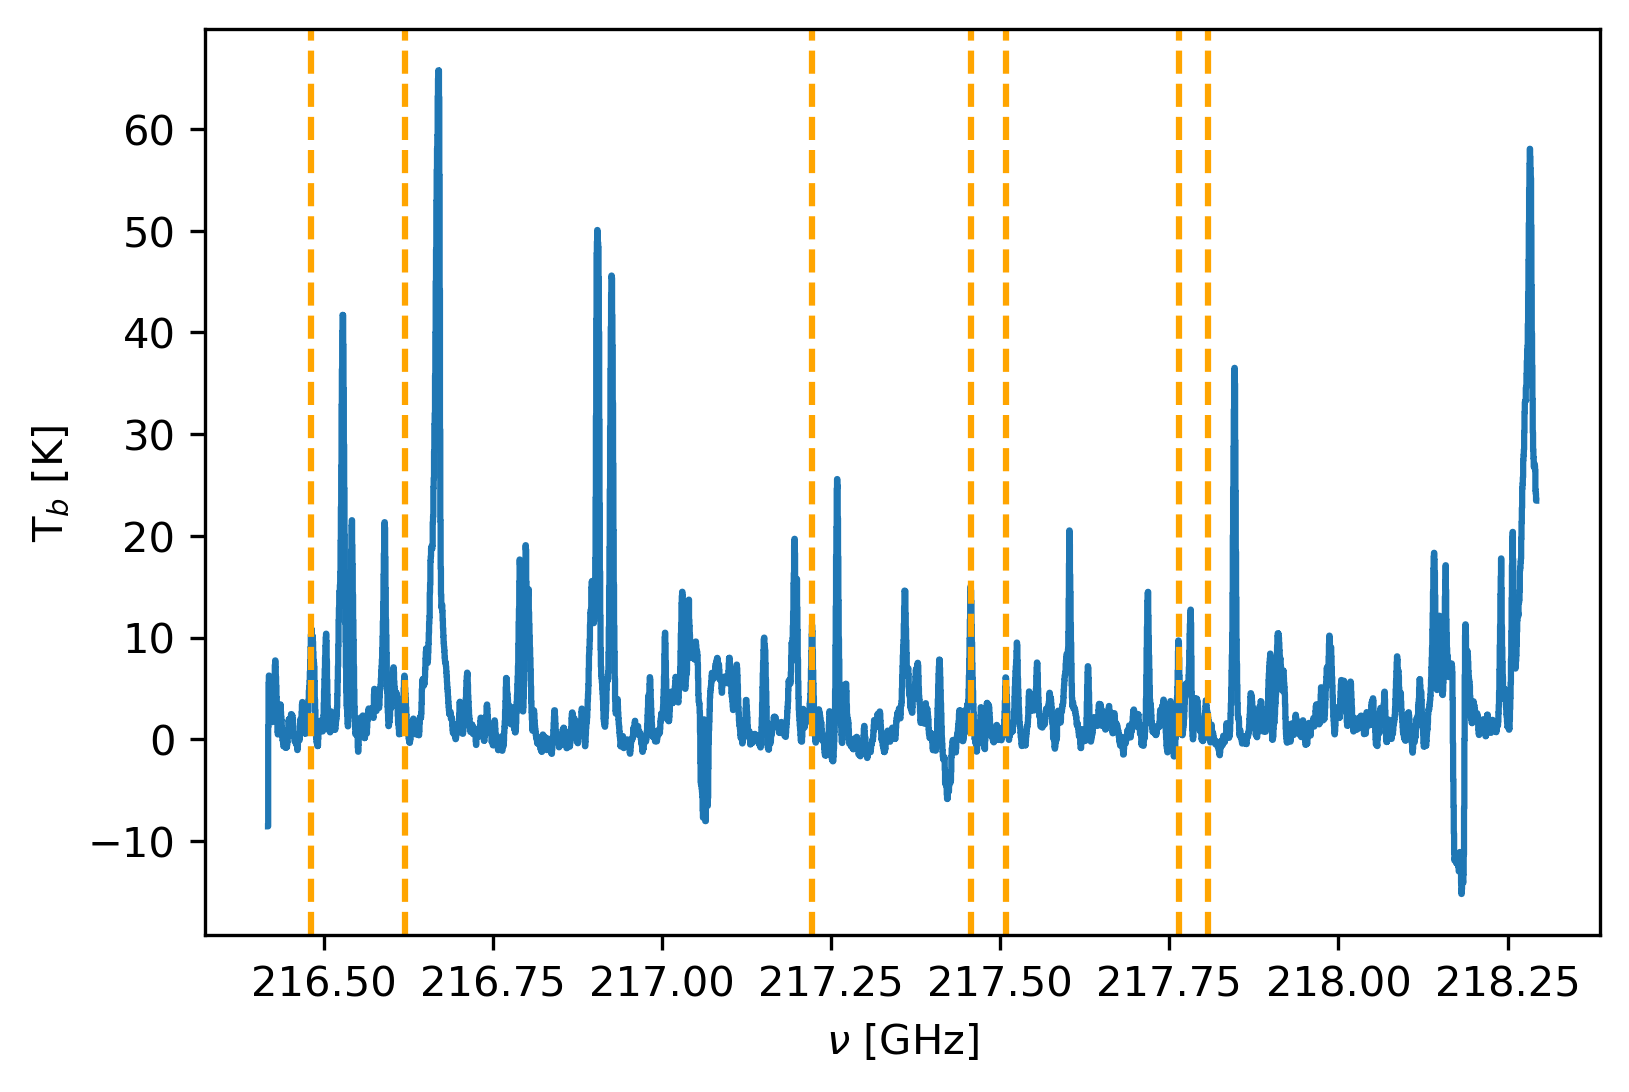

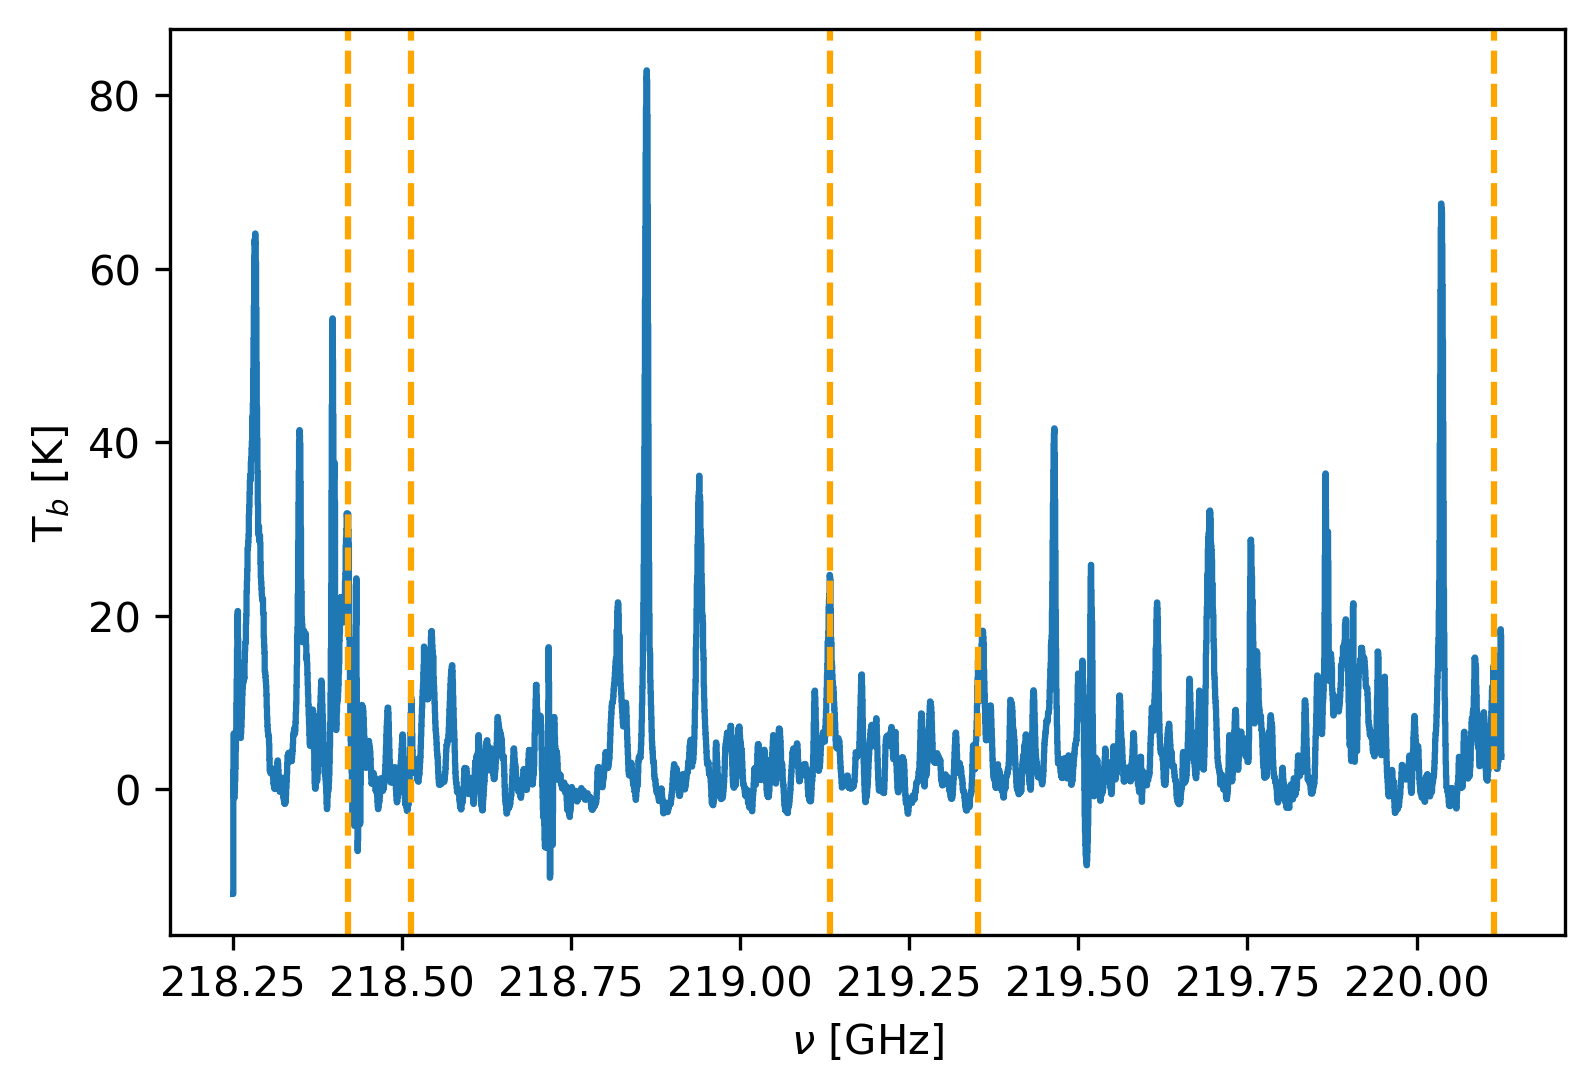

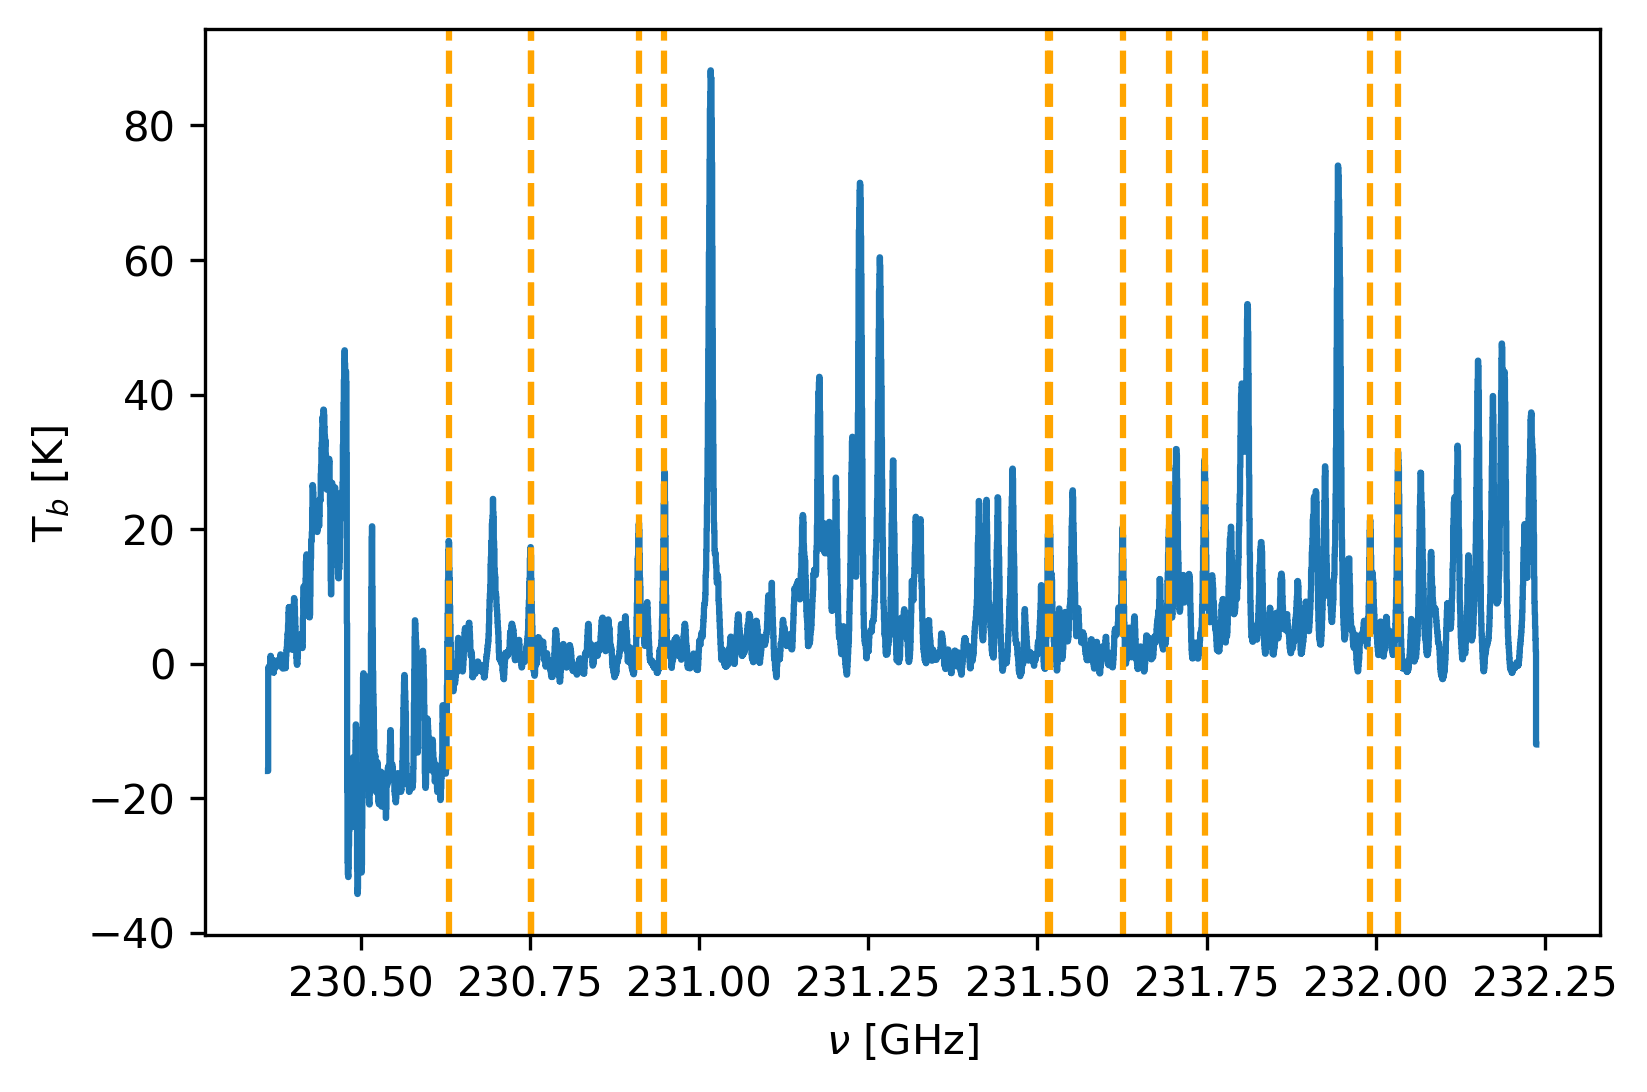

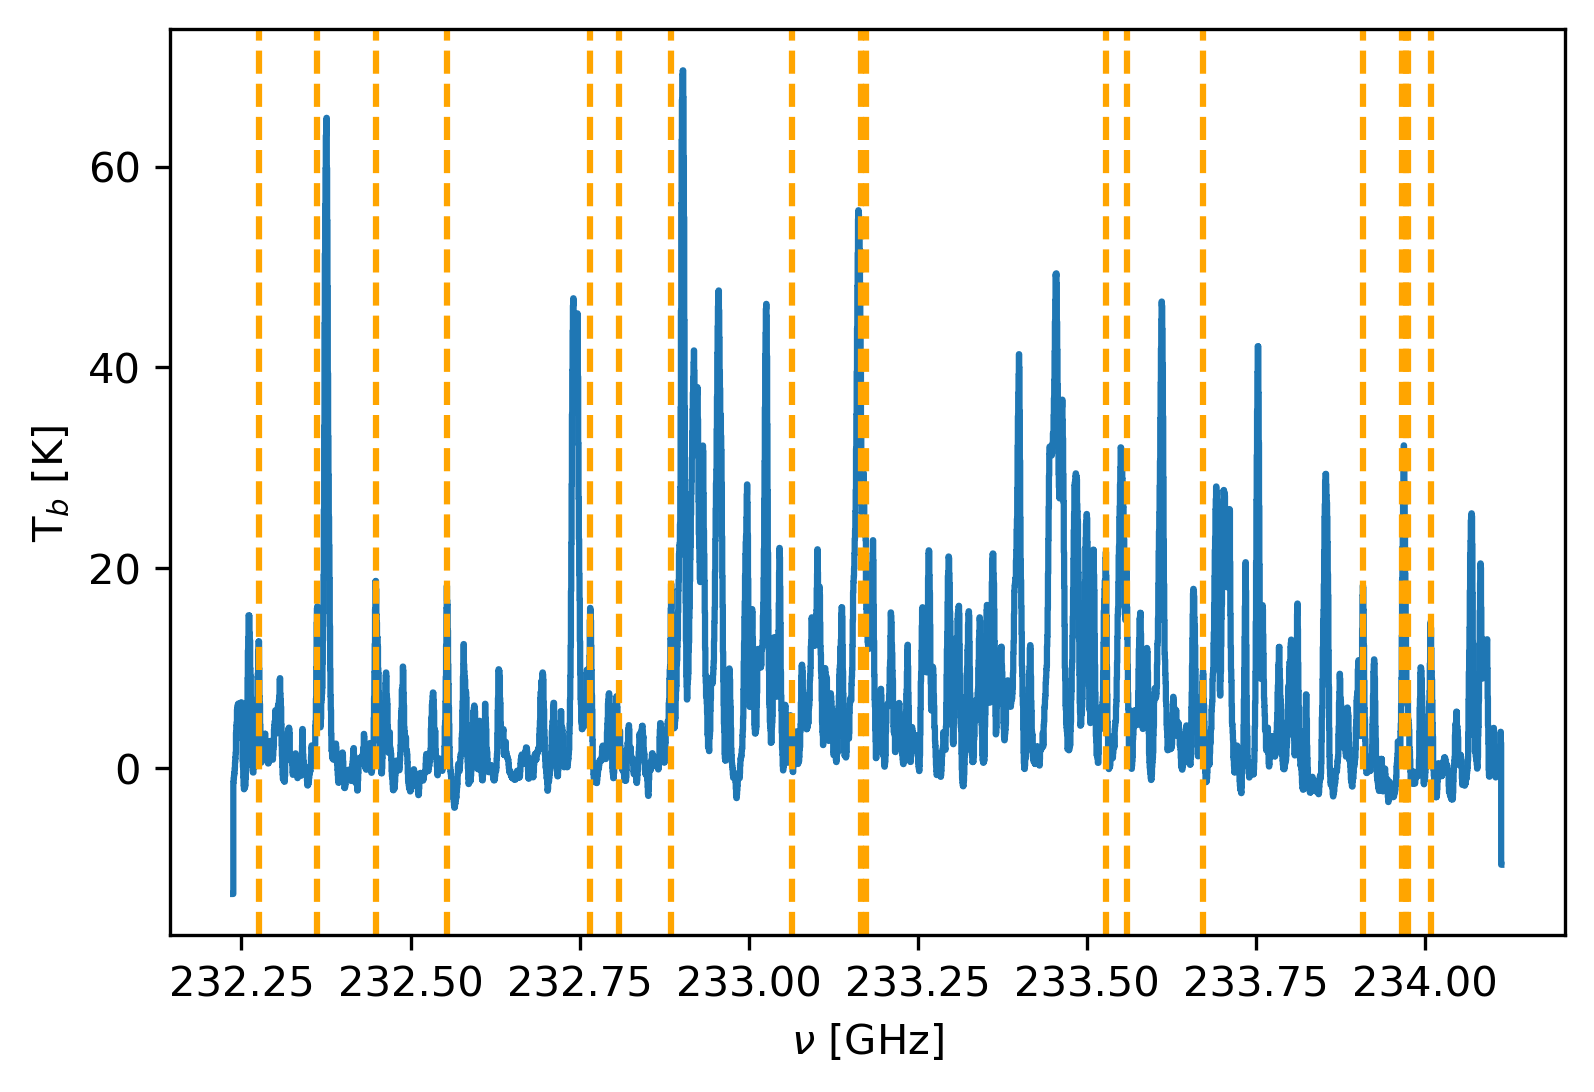

In [47]:
for cubepath in cubes:
    cube=sc.read(cubepath)
    spax=cube.spectral_axis.to('GHz')
    flux=cube[:,pixcoords[0],pixcoords[1]]
    plt.plot(spax.value,flux.value,drawstyle='steps-mid')
    minspax=min(spax)
    maxspax=max(spax)
    temp1=freqs <= maxspax
    temp2=freqs >= minspax
    okindices=temp1*temp2
    linesinspw=freqs[okindices]
    for line in linesinspw:
        plt.axvline(x=line.value,color='orange',linestyle='--')
    plt.ylabel(r'T$_b$ [K]')
    plt.xlabel(r'$\nu$ [GHz]')
    plt.show()
    #sys.exit()

In [48]:
len(freqs)

42

In [54]:
max(allmaster['Eupper'])

503.7544866772733